<img src='../images/IDPs image.jpg'>

# Project Title: Somali IDP Displacement Cause Prediction using Machine Learning
The "Somali IDP Displacement" project aims to develop a machine learning model capable of predicting the primary cause of internal displacement among Somali populations. This system utilizes various environmental, economic, and conflict-related factors to understand the main drivers behind population displacement. Such insights are crucial for effective humanitarian planning and intervention.

The dataset contains the following variables:
### Demographic and Temporal Variables:
* **'1. Year':** – The year in which the displacement was recorded. This helps track temporal trends over time.
* **'2. Month':** – The month during which displacement occurred. Seasonal patterns (e.g., rainy season or dry season) can influence displacement.
* **'3. Region':** – Geographic region within Somalia where the displacement was reported (e.g., Bay, Banadir). This is a critical categorical feature tied to climate, conflict, and aid accessibility.
### Environmental and Climate Variables:
* **'4. Rainfall mm':**  – Total rainfall measured in millimeters during the time of displacement. Low rainfall may indicate drought conditions.
* **'5. Drought index':**  – Numerical index indicating the severity of drought in the region. Higher values suggest extreme drought.
* **'6. Flood event':**  – A binary indicator (0 or 1) denoting whether a flood occurred during the displacement period.
### Food and Nutrition Indicators:
* **'7. food price index':**  – Index measuring food price inflation. High food prices are commonly linked to food insecurity and displacement.
* **'8. ipc phase':**  – Integrated Phase Classification (IPC) score, indicating levels of food insecurity (ranging from minimal to famine).
* **'9. malnutrition rate':** – Percentage of the population suffering from malnutrition in the region.
### Conflict and Security Factors:
* **'10. conflict events':**  – The number of conflict-related incidents reported in the region during the time of displacement.
* **'11. conflict deaths':**  – Total number of fatalities due to conflict in the given time and place.
* **'12. armed group presence':**  – Binary indicator showing whether armed groups were active in the region
### Population and Living Conditions:
* **'13. population total':**  – Total population in the area where displacement occurred.
* **'14. family size':**  – Average number of individuals in a household. Larger families may experience greater vulnerability.
* **'15. shelter type':**  – The type of shelter the displaced individuals were using (e.g., tent, makeshift, formal camp).
* **'16. water access':**  – Binary variable indicating whether there was reliable access to clean water.
* **'17. food security level':**  – Categorical assessment of the general food security status of the population.
### Target Variable:
* **'18. IDPs':**  – Number of internally displaced persons in the dataset for that region and time period.
* **'19. displacement_cause':**  – This is the main prediction target. It indicates the root cause of displacement, categorized into types such as: Conflict, Drought, Flood and Other causes (e.g., economic hardship)

------------------------------

## Import Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,  classification_report, ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN

----------------------------

## Reading Data Set

In [6]:
df = pd.read_csv('somali_IDP_dataset.csv')
df.head()

,year,month,region,rainfall_mm,drought_index,flood_event,food_price_index,ipc_phase,malnutrition_rate,conflict_events,conflict_deaths,armed_group_presence,population_total,family_size,shelter_type,water_access,food_security_level,IDPs,displacement_cause
0,2016,6,Nugal,120.1,1.91,1,113.12,4,27.3,1,1,0,79594,7,Tent,0,Moderate,2449,Flood
1,2020,6,Bari,61.9,0.57,0,136.48,3,29.4,1,1,1,194493,10,Permanent,0,Severe,1571,Eviction
2,2018,8,Middle Juba,66.1,1.93,0,107.67,5,28.1,1,1,1,354044,8,Tent,1,Moderate,2581,Eviction
3,2015,10,Bay,51.8,1.67,0,125.84,3,18.1,1,1,0,142185,5,Tent,0,Severe,2492,Eviction
4,2015,3,Gedo,69.4,1.26,0,119.90,5,22.1,1,1,0,135551,4,Tent,1,Moderate,2057,Eviction


----------------------

### Dimensions of dataset

In [7]:
df.shape

(3498, 19)

-----------------------

### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  3498 non-null   int64  
 1   month                 3498 non-null   int64  
 2   region                3498 non-null   object 
 3   rainfall_mm           3498 non-null   float64
 4   drought_index         3498 non-null   float64
 5   flood_event           3498 non-null   int64  
 6   food_price_index      3498 non-null   float64
 7   ipc_phase             3498 non-null   int64  
 8   malnutrition_rate     3498 non-null   float64
 9   conflict_events       3498 non-null   int64  
 10  conflict_deaths       3498 non-null   int64  
 11  armed_group_presence  3498 non-null   int64  
 12  population_total      3498 non-null   int64  
 13  family_size           3498 non-null   int64  
 14  shelter_type          3498 non-null   object 
 15  water_access         

-------------------

### Data Statistics

In [9]:
df.describe()

,year,month,rainfall_mm,drought_index,flood_event,food_price_index,ipc_phase,malnutrition_rate,conflict_events,conflict_deaths,armed_group_presence,population_total,family_size,water_access,IDPs
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.00000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,2016.926815,6.471984,61.786964,2.004577,0.107490,126.055672,3.092053,24.72829,2.034019,2.244425,0.356775,275653.424814,7.027730,0.606632,2543.740709
std,4.323469,3.464009,39.181297,1.065116,0.309779,28.091967,1.118176,6.44397,3.163858,4.152237,0.479116,129735.602920,2.012565,0.488567,1255.987104
min,2010.000000,1.000000,0.600000,0.000000,0.000000,69.130000,1.000000,10.00000,0.000000,0.000000,0.000000,50222.000000,4.000000,0.000000,176.000000
25%,2013.000000,3.000000,29.200000,1.250000,0.000000,110.490000,2.000000,20.40000,0.000000,0.000000,0.000000,165746.250000,5.000000,0.000000,1700.000000
50%,2017.000000,6.000000,55.250000,1.780000,0.000000,121.200000,3.000000,24.40000,1.000000,1.000000,0.000000,274919.500000,7.000000,1.000000,2223.500000
75%,2021.000000,10.000000,89.500000,2.540000,0.000000,133.077500,4.000000,28.40000,3.000000,3.000000,1.000000,388310.000000,9.000000,1.000000,3060.000000
max,2024.000000,12.000000,216.600000,4.000000,1.000000,277.290000,5.000000,58.66000,30.000000,44.000000,1.000000,499442.000000,10.000000,1.000000,10763.000000


----------------------------

### Data Columns

In [10]:
df.columns

Index(['year', 'month', 'region', 'rainfall_mm', 'drought_index',
       'flood_event', 'food_price_index', 'ipc_phase', 'malnutrition_rate',
       'conflict_events', 'conflict_deaths', 'armed_group_presence',
       'population_total', 'family_size', 'shelter_type', 'water_access',
       'food_security_level', 'IDPs', 'displacement_cause'],
      dtype='object')

--------------------------

## Data Clearning

### Checking Missinge Values

In [11]:
# Check how many missing values in the dataset
print("The total missing values in this dataset:- " , len(df[df.isnull().any(axis=1)]))

The total missing values in this dataset:-  0


-------------------

#### Handle if Exists by droping

In [12]:
# Handling Missing Values if exist by using dropna  method to drop permanentally
df.dropna(inplace=True)

---------------------------------

### Checing Duplicate Values

In [13]:
print("Number Of Duplicate Values: ",df.duplicated().sum())

Number Of Duplicate Values:  0


-------------------------------------

### Checking Average of duplicate values

In [14]:
print("Average Of Duplicate Values: ",round(df.duplicated().sum() / df.shape[0] * 100,2),"%")

Average Of Duplicate Values:  0.0 %


----------------

#### handline duplicate values of droping & Overwrite the original dataset

In [15]:
df_unique = df.drop_duplicates()
# Overwrite the original dataframe with the unique one
df = df_unique

--------------------

## Checking outliers

In [16]:
# Define a function to detect outliers based on the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Columns to check for outliers
columns_to_check = ['year', 'month', 'rainfall_mm', 'drought_index', 'flood_event', 'food_price_index', 'ipc_phase', 'malnutrition_rate','conflict_events', 'conflict_deaths','armed_group_presence','population_total','family_size', 'water_access', 'IDPs']

# Calculate the number of outliers in each column
outliers_count = {column: detect_outliers_iqr(df, column) for column in columns_to_check}
outliers_count


{'year': 0,
 'month': 0,
 'rainfall_mm': 13,
 'drought_index': 0,
 'flood_event': 376,
 'food_price_index': 216,
 'ipc_phase': 0,
 'malnutrition_rate': 78,
 'conflict_events': 195,
 'conflict_deaths': 285,
 'armed_group_presence': 0,
 'population_total': 0,
 'family_size': 0,
 'water_access': 0,
 'IDPs': 155}

----------------------

## cap (Winsorize) outliers based on the IQR method

In [17]:
# Define a function to cap (Winsorize) outliers based on the IQR method for a given column
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers by setting them to the lower or upper bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    return data

# Apply the capping for each column individually
df = df.copy()
for column in columns_to_check:
    df = cap_outliers_iqr(df, column)

# Check the new shape of the dataset to see how many records remain
df.shape

(3498, 19)

-----------------------

### Data Statistics After Clearing Data

In [18]:
df.describe()

,year,month,rainfall_mm,drought_index,flood_event,food_price_index,ipc_phase,malnutrition_rate,conflict_events,conflict_deaths,armed_group_presence,population_total,family_size,water_access,IDPs
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.0,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,2016.926815,6.471984,61.742782,2.004577,0.0,122.886913,3.092053,24.630846,1.801744,1.769440,0.356775,275653.424814,7.027730,0.606632,2495.682104
std,4.323469,3.464009,39.034688,1.065116,0.0,18.386251,1.118176,6.141547,2.237235,2.419732,0.479116,129735.602920,2.012565,0.488567,1103.180175
min,2010.000000,1.000000,0.600000,0.000000,0.0,76.608750,1.000000,10.000000,0.000000,0.000000,0.000000,50222.000000,4.000000,0.000000,176.000000
25%,2013.000000,3.000000,29.200000,1.250000,0.0,110.490000,2.000000,20.400000,0.000000,0.000000,0.000000,165746.250000,5.000000,0.000000,1700.000000
50%,2017.000000,6.000000,55.250000,1.780000,0.0,121.200000,3.000000,24.400000,1.000000,1.000000,0.000000,274919.500000,7.000000,1.000000,2223.500000
75%,2021.000000,10.000000,89.500000,2.540000,0.0,133.077500,4.000000,28.400000,3.000000,3.000000,1.000000,388310.000000,9.000000,1.000000,3060.000000
max,2024.000000,12.000000,179.950000,4.000000,0.0,166.958750,5.000000,40.400000,7.500000,7.500000,1.000000,499442.000000,10.000000,1.000000,5100.000000


-------------------------------------------------------

## Data Visualizations...

========================================================================================

#### Visualize Regions

C:\Users\huseinhashi\AppData\Local\Temp\ipykernel_2328\2861460832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', palette='pastel')


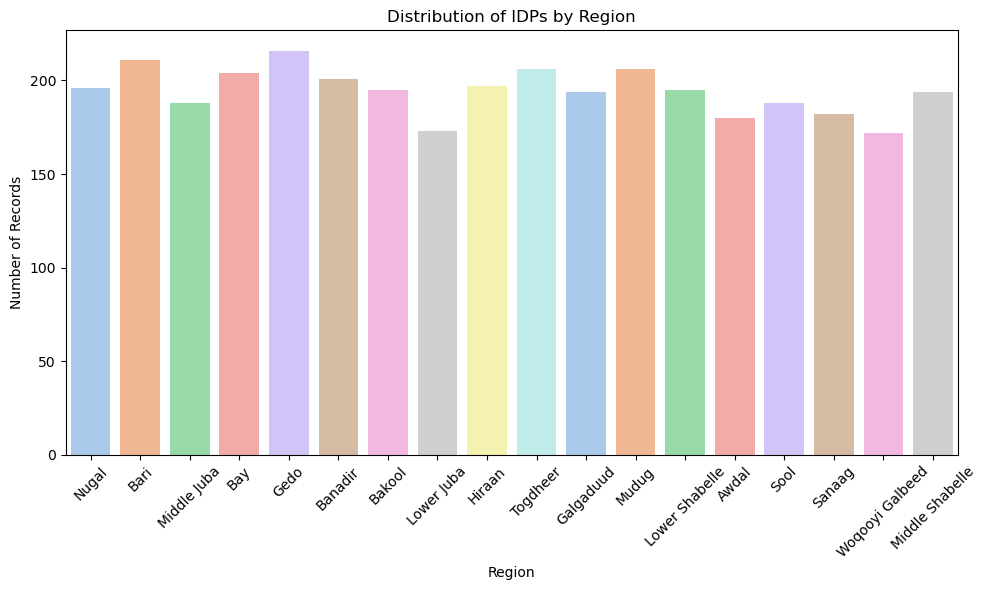

In [19]:
# Display  IDPs by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', palette='pastel')
plt.title('Distribution of IDPs by Region')
plt.xlabel('Region')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../virtualization/idps_by_region.png')
plt.show()


-------------------

#### Visualize Displacement Causes

C:\Users\huseinhashi\AppData\Local\Temp\ipykernel_2328\631990739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='displacement_cause', order=df['displacement_cause'].value_counts().index, palette='Set2')


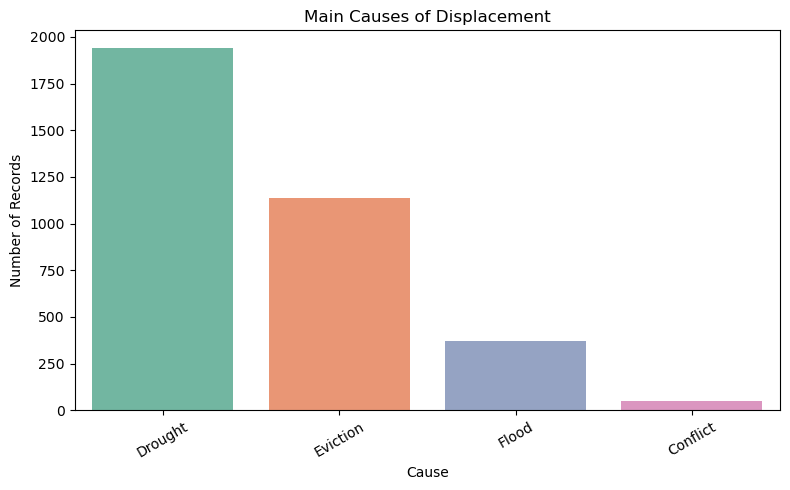

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='displacement_cause', order=df['displacement_cause'].value_counts().index, palette='Set2')
plt.title('Main Causes of Displacement')
plt.xlabel('Cause')
plt.ylabel('Number of Records')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('../virtualization/displacement_causes.png')
plt.show()


-------------------

#### Visualize Conflict Events by Region

C:\Users\huseinhashi\AppData\Local\Temp\ipykernel_2328\602681158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='region', y='conflict_events', estimator='sum', palette='Blues')


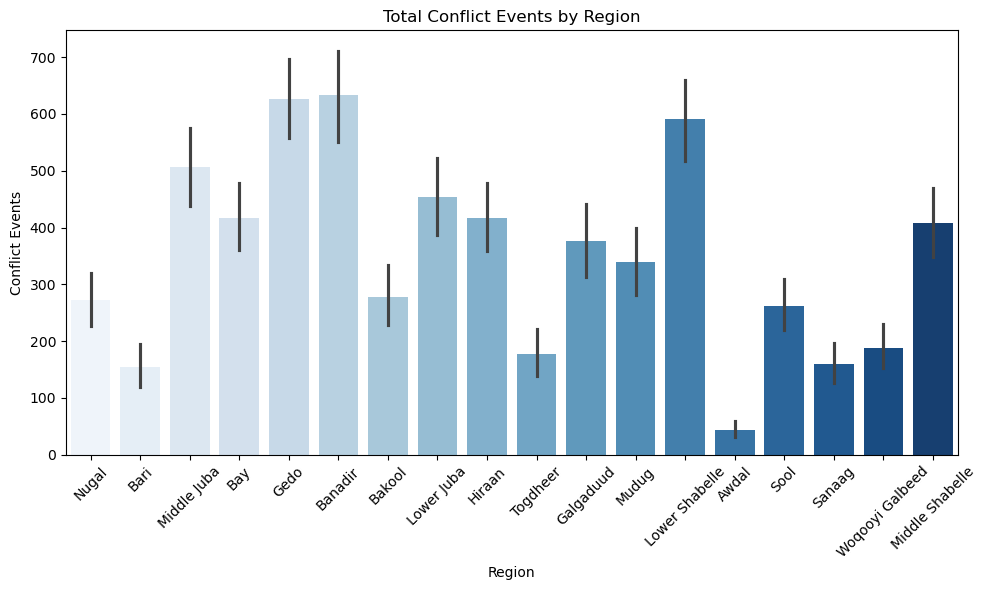

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='conflict_events', estimator='sum', palette='Blues')
plt.title('Total Conflict Events by Region')
plt.xlabel('Region')
plt.ylabel('Conflict Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../virtualization/conflict_events_by_region.png')
plt.show()


-------------------

#### Visualize Average Family Size by Region

C:\Users\huseinhashi\AppData\Local\Temp\ipykernel_2328\3887462854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='region', y='family_size', estimator='mean', palette='Greens')


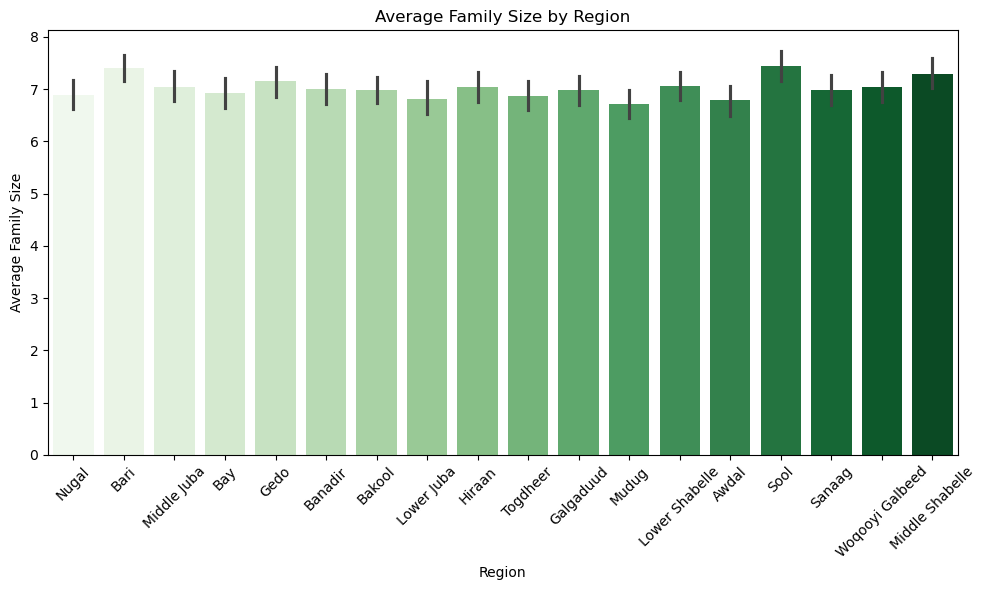

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='family_size', estimator='mean', palette='Greens')
plt.title('Average Family Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Family Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../virtualization/family_size_by_region.png')
plt.show()


-------------------

=================================  END DATA VISUALIZATION ======================================

----------------------------

## Encoding categorical variables using LabelEncoder()

In [23]:
# Initialize encoders
region_encoder = LabelEncoder()
shelter_encoder = LabelEncoder()
foodsec_encoder = LabelEncoder()

# Encode categorical features
df['region'] = region_encoder.fit_transform(df['region'])
df['shelter_type'] = shelter_encoder.fit_transform(df['shelter_type'])
df['food_security_level'] = foodsec_encoder.fit_transform(df['food_security_level'])

#### Check if encoded

In [24]:
df.head()

,year,month,region,rainfall_mm,drought_index,flood_event,food_price_index,ipc_phase,malnutrition_rate,conflict_events,conflict_deaths,armed_group_presence,population_total,family_size,shelter_type,water_access,food_security_level,IDPs,displacement_cause
0,2016.0,6.0,13,120.1,1.91,0.0,113.12,4.0,27.3,1.0,1.0,0.0,79594.0,7.0,2,0.0,0,2449.0,Flood
1,2020.0,6.0,3,61.9,0.57,0.0,136.48,3.0,29.4,1.0,1.0,1.0,194493.0,10.0,1,0.0,2,1571.0,Eviction
2,2018.0,8.0,10,66.1,1.93,0.0,107.67,5.0,28.1,1.0,1.0,1.0,354044.0,8.0,2,1.0,0,2581.0,Eviction
3,2015.0,10.0,4,51.8,1.67,0.0,125.84,3.0,18.1,1.0,1.0,0.0,142185.0,5.0,2,0.0,2,2492.0,Eviction
4,2015.0,3.0,6,69.4,1.26,0.0,119.90,5.0,22.1,1.0,1.0,0.0,135551.0,4.0,2,1.0,0,2057.0,Eviction


--------------------------------------------------------

### Removing Unwanted Features

In [25]:
# df.drop(columns=['ID'], inplace=True)

#### Check if dropped

In [26]:
df.columns

Index(['year', 'month', 'region', 'rainfall_mm', 'drought_index',
       'flood_event', 'food_price_index', 'ipc_phase', 'malnutrition_rate',
       'conflict_events', 'conflict_deaths', 'armed_group_presence',
       'population_total', 'family_size', 'shelter_type', 'water_access',
       'food_security_level', 'IDPs', 'displacement_cause'],
      dtype='object')

## Building Machine Learning Algorithms

### Separate features (X) and target variable (y) into Two Classes

==============================================================

### Regression Classes 
This classes we will use to predict numeric values eg:- (BMI, Lower Limmit, Upper, Limmit, and body fat percentage).

In [27]:
X = df[['year', 'month', 'region', 'rainfall_mm', 'drought_index',
    'flood_event', 'food_price_index', 'ipc_phase', 'malnutrition_rate',
    'conflict_events', 'conflict_deaths', 'armed_group_presence',
    'population_total', 'family_size', 'shelter_type', 'water_access',
    'food_security_level']]
yr = df[['IDPs']] # yr-> y-Regression; our target varaibles according numerics

------------------------

### Classification Classes 
This classes we will use to predict text, classifcation values eg:- (Fitness Level, Fitness Gaol, Fitness Type, Excercies, Equipments, and Conclussion Recommendation).

In [28]:
X = df[['year', 'month', 'region', 'rainfall_mm', 'drought_index',
    'flood_event', 'food_price_index', 'ipc_phase', 'malnutrition_rate',
    'conflict_events', 'conflict_deaths', 'armed_group_presence',
    'population_total', 'family_size', 'shelter_type', 'water_access',
    'food_security_level']]
yc = df[['displacement_cause']]

---------

## Train Test Split
In this section also we split our dataset into two classes

In [29]:
# Split the data into training and testing sets correctly
X_train, X_test, yr_train, yr_test = train_test_split(X, yr, test_size=0.20, random_state=42) # Regression Classes

In [30]:
# Split the data into training and testing sets correctly
X_train, X_test, yc_train, yc_test = train_test_split(X, yc, test_size=0.20, random_state=42) # Classification Classes

-------------------------------------------------------

## Building Regression Models

====================================

## 1. Building decision tree regression model

In [31]:
# Initialize the decisontree model
dec_reg = DecisionTreeRegressor()

In [32]:
# Train the model on the training set
dec_reg.fit(X_train, yr_train)

DecisionTreeRegressor()

In [33]:
print("Score of training Decision Tree Regression Model: ", dec_reg.score(X_train, yr_train)* 100 )

Score of training Decision Tree Regression Model:  100.0


In [34]:
print("Score of testing Decision Tree Regression Model: ", dec_reg.score(X_test, yr_test)* 100 )

Score of testing Decision Tree Regression Model:  80.99443531969679


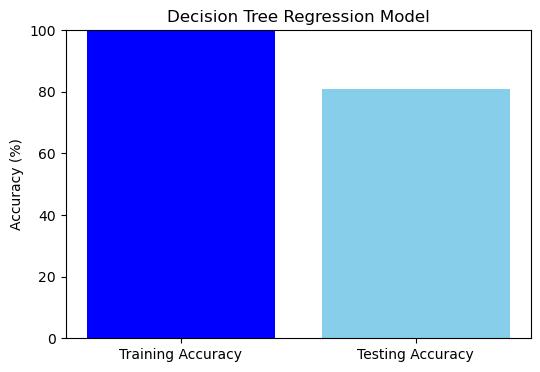

In [35]:
training_accuracy = round(dec_reg.score(X_train,yr_train)*100,2)
testing_accuracy = round(dec_reg.score(X_test,yr_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Decision Tree Regression Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/dt_rg.png')
plt.show()

------------------------------------------------------------

## 2. Building random forest regression model

In [36]:
ran_reg = RandomForestRegressor()
# Train the model
ran_reg.fit(X_train, yr_train)

C:\Users\huseinhashi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [37]:
print("Score of training Random Forest Regression Model: ", ran_reg.score(X_train, yr_train)* 100 )

Score of training Random Forest Regression Model:  98.84650834698266


In [38]:
print("Score of testing Random foret Regression Model: ", ran_reg.score(X_test, yr_test)* 100 )

Score of testing Random foret Regression Model:  91.01498672731051


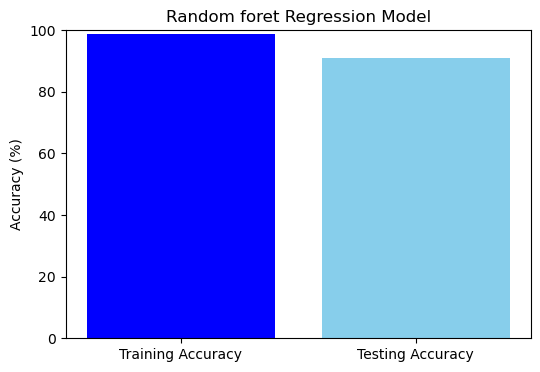

In [39]:
training_accuracy = round(ran_reg.score(X_train,yr_train)*100,2)
testing_accuracy = round(ran_reg.score(X_test,yr_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Random foret Regression Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/ran_reg.png')
plt.show()

----------------------------------

## 3. Building Gradient Boosting regression model

In [40]:
gb_reg = MultiOutputRegressor(GradientBoostingRegressor())

gb_reg.fit(X_train, yr_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [41]:
print("Score of training GradientBosting regression model: ", gb_reg.score(X_train, yr_train) * 100)

Score of training GradientBosting regression model:  95.94707651217821


In [42]:
print("Score of testing GradientBosting regression model: ", gb_reg.score(X_test, yr_test) * 100)

Score of testing GradientBosting regression model:  93.57015848075783


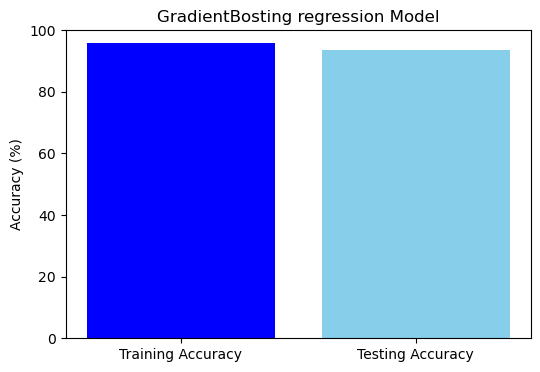

In [43]:
training_accuracy = round(gb_reg.score(X_train,yr_train)*100,2)
testing_accuracy = round(gb_reg.score(X_test,yr_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('GradientBosting regression Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/gb_reg.png')
plt.show()

---------------------------------

## 4. Building Ada Boost regression model

In [44]:
adb_reg = MultiOutputRegressor(AdaBoostRegressor())

adb_reg.fit(X_train, yr_train)

MultiOutputRegressor(estimator=AdaBoostRegressor())

In [45]:
print("Score of training AdaBoost Regression Model: ", adb_reg.score(X_train, yr_train))

Score of training AdaBoost Regression Model:  0.8834530090905346


In [46]:
print("Score of testing AdaBoost Regression Model: ", adb_reg.score(X_test, yr_test))

Score of testing AdaBoost Regression Model:  0.8735583647971918


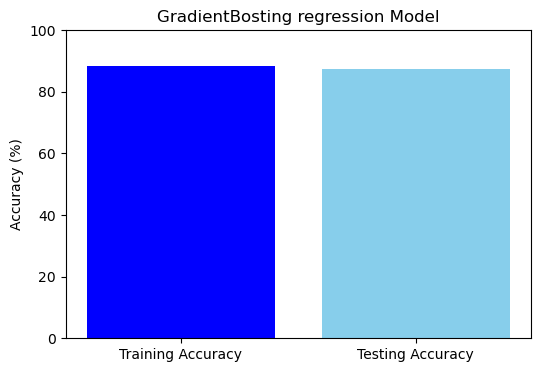

In [47]:
training_accuracy = round(adb_reg.score(X_train,yr_train)*100,2)
testing_accuracy = round(adb_reg.score(X_test,yr_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('GradientBosting regression Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/adb_reg.png')
plt.show()

## 5. Building Linear  regression model

In [48]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, yr_train)

LinearRegression()

In [49]:
print("Score of training Linear Regression Model: ", lin_reg.score(X_train, yr_train) * 100)

Score of training Linear Regression Model:  92.01481911311829


In [50]:
print("Score of testing Linear Regression Model: ", lin_reg.score(X_test, yr_test) * 100)

Score of testing Linear Regression Model:  90.37345542482656


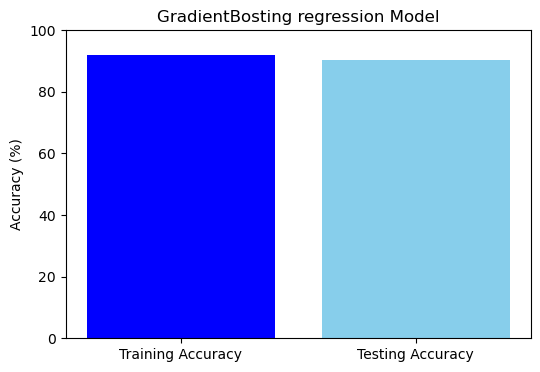

In [51]:
training_accuracy = round(lin_reg.score(X_train,yr_train)*100,2)
testing_accuracy = round(lin_reg.score(X_test,yr_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('GradientBosting regression Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/lin_reg.png')
plt.show()

-----------------------------------------------------

================================= END BULIDING REGRESSION MODELS ====================================

---------------------------------------------

## Building Classification Models

=======================================

## 1. Building decision tree classfication model

In [52]:
dec_clf = MultiOutputClassifier(DecisionTreeClassifier())

dec_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [53]:
print("Score of traing Decision Tree Classification Model: ", dec_clf.score(X_train, yc_train) * 100)

Score of traing Decision Tree Classification Model:  100.0


In [54]:
print("Score of testing Decision Tree Classification Model: ", dec_clf.score(X_test, yc_test) * 100)

Score of testing Decision Tree Classification Model:  53.142857142857146


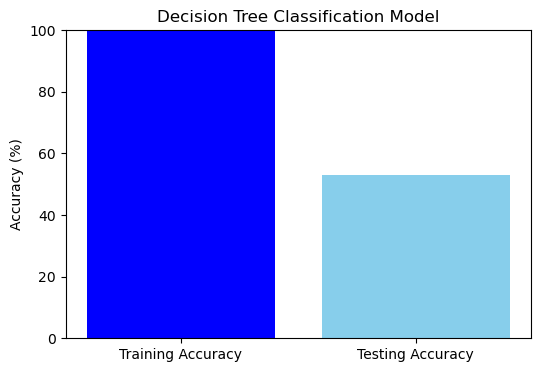

In [55]:
training_accuracy = round(dec_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(dec_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Decision Tree Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('dec_clf.png')
plt.show()


-----------------------------------------

## 2. Building random forest classfication model

In [56]:
ran_clf = MultiOutputClassifier(RandomForestClassifier())

ran_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [57]:
print("Score of traing Random Forest Classification Model: ", ran_clf.score(X_train, yc_train) * 100)

Score of traing Random Forest Classification Model:  100.0


In [58]:
print("Score of testing Random Forest Classification Model: ", ran_clf.score(X_test, yc_test) * 100)

Score of testing Random Forest Classification Model:  59.857142857142854


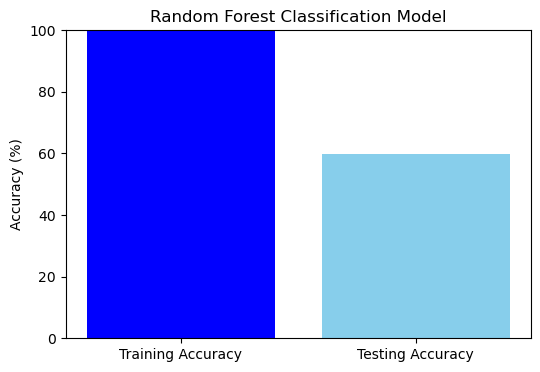

In [59]:
training_accuracy = round(ran_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(ran_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Random Forest Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('ran_clf.png')
plt.show()


-------------------------------

## 3. Building  Logistic  Regession model

In [60]:
# Create a pipeline that first scales the data then applies logistic regression
log_clf = MultiOutputClassifier(make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
log_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression(max_iter=1000))]))

In [61]:
print("Score of traing Logistic Regression Model: ", log_clf.score(X_train, yc_train) * 100)

Score of traing Logistic Regression Model:  60.40028591851322


In [62]:
print("Score of testing Logistic Regression Model: ", log_clf.score(X_test, yc_test) * 100)

Score of testing Logistic Regression Model:  58.42857142857143


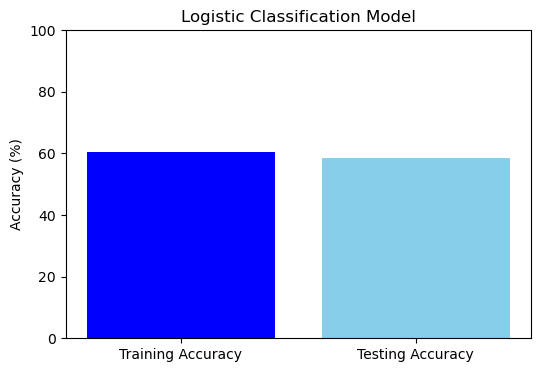

In [63]:
training_accuracy = round(log_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(log_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Logistic Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('log_clf.png')
plt.show()


--------------------

## 4. Building SVM classification model

In [64]:
svm_clf = MultiOutputClassifier(SVC())

svm_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=SVC())

In [65]:
print("Score of traing SVM Classification Model: ", svm_clf.score(X_train, yc_train) * 100)

Score of traing SVM Classification Model:  55.360972122944965


In [66]:
print("Score of testing SVM Classification Model: ", svm_clf.score(X_test, yc_test) * 100)

Score of testing SVM Classification Model:  55.57142857142857


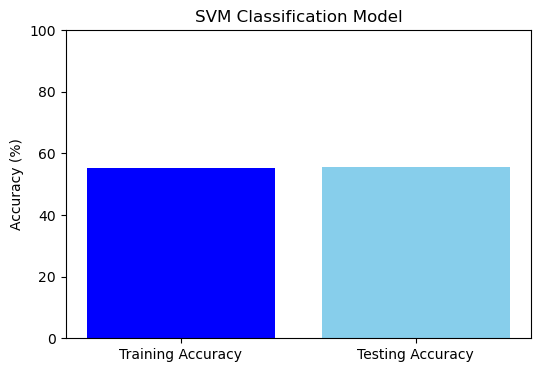

In [67]:
training_accuracy = round(svm_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(svm_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('SVM Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('svm_clf.png')
plt.show()


-----------------------------------

================================= END BULIDING CLASSIFICATION MODELS ====================================

----------------------------------------------------

## Model Improvment by using SMOTEENN()
In this section we will improve Models:

## 1. Building Decision Tree classification model using SMOTEENN

In [68]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,yc)

In [69]:
# Split the data into training and testing sets correctly
X_train, X_test, yc_train, yc_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42) # Classification Classes

In [70]:
dec_clf = MultiOutputClassifier(DecisionTreeClassifier())

dec_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [71]:
print("Score of traing Decision Tree Classification Model: ", dec_clf.score(X_train, yc_train) * 100)
print("Score of testing Decision Tree Classification Model: ", dec_clf.score(X_test, yc_test) * 100)

Score of traing Decision Tree Classification Model:  100.0
Score of testing Decision Tree Classification Model:  90.84507042253522


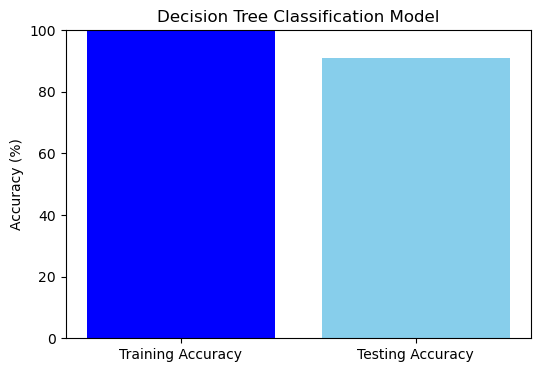

In [72]:
training_accuracy = round(dec_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(dec_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Decision Tree Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/dec_clf.png')
plt.show()


--------------------

## 2. Building random forest classfication model using SMOTEENN

In [73]:
ran_clf = MultiOutputClassifier(RandomForestClassifier())

ran_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [74]:
print("Score of traing Random Forest Classification Model: ", ran_clf.score(X_train, yc_train) * 100)
print("Score of testing Random Forest Classification Model: ", ran_clf.score(X_test, yc_test) * 100)

Score of traing Random Forest Classification Model:  100.0
Score of testing Random Forest Classification Model:  91.90140845070422


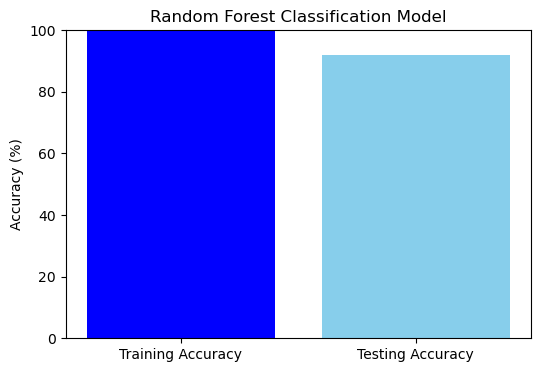

In [75]:
training_accuracy = round(ran_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(ran_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Random Forest Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/ran_clf.png')
plt.show()

--------------------

## 3. Building  Logistic  Regession model using SMOTEENN

In [76]:
# Create a pipeline that first scales the data then applies logistic regression
log_clf = MultiOutputClassifier(make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
log_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression(max_iter=1000))]))

In [77]:
print("Score of traing Logistic Regression Model: ", log_clf.score(X_train, yc_train) * 100)
print("Score of testing Logistic Regression Model: ", log_clf.score(X_test, yc_test) * 100)

Score of traing Logistic Regression Model:  91.9753086419753
Score of testing Logistic Regression Model:  91.19718309859155


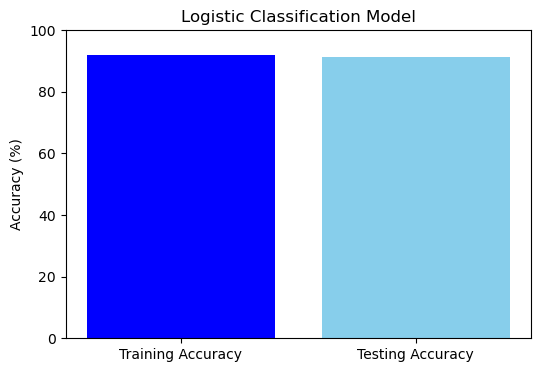

In [78]:
training_accuracy = round(log_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(log_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('Logistic Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/log_clf.png')
plt.show()


---------------------------------

## 4. Building SVM classification model using SMOTEENN

In [79]:
svm_clf = MultiOutputClassifier(SVC())

svm_clf.fit(X_train, yc_train)

MultiOutputClassifier(estimator=SVC())

In [80]:
print("Score of traing SVM Classification Model: ", svm_clf.score(X_train, yc_train) * 100)
print("Score of testing SVM Classification Model: ", svm_clf.score(X_test, yc_test) * 100)

Score of traing SVM Classification Model:  45.326278659611994
Score of testing SVM Classification Model:  44.71830985915493


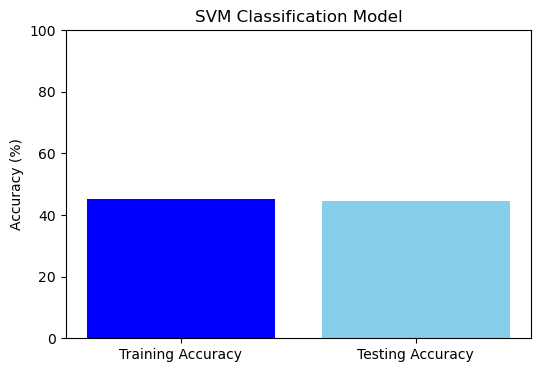

In [81]:
training_accuracy = round(svm_clf.score(X_train,yc_train)*100,2)
testing_accuracy = round(svm_clf.score(X_test,yc_test)*100,2)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'skyblue'])
plt.title('SVM Classification Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.savefig('../virtualization/svm_clf.png')
plt.show()


-----------------------------------

## Model Selection & Deployment
We selected decison tree model for both classification and regression model with heigh performace 

In [82]:
from joblib import dump

# Save Regression Models in regressions folder
dump(dec_reg, '../models/regressions/decission_tree_regressor.joblib') 
dump(ran_reg, '../models/regressions/random_forest_regressor.joblib')
dump(gb_reg, '../models/regressions/gradient_regressor.joblib') # we selected this model to predict our nemeric varaibles
dump(adb_reg, '../models/regressions/adaboost_regressor.joblib')
dump(lin_reg, '../models/regressions/lin_regressor.joblib')

# Save Regression Models in regressions folder
dump(dec_clf, '../models/classifications/decission_tree_classifier.joblib') 
dump(ran_clf, '../models/classifications/ran_classifier.joblib')# we selected this model to predict our category
dump(log_clf, '../models/classifications/logistict_classifier.joblib')  
dump(svm_clf, '../models/classifications/svm_classifier.joblib')

# Save encoders
dump(region_encoder, '../encoders/region_encoder.pkl')
dump(shelter_encoder, '../encoders/shelter_encoder.pkl')
dump(foodsec_encoder, '../encoders/foodsec_encoder.pkl')

print("Successfully Deployed ✅")

Successfully Deployed ✅


--------------------------

## END PROJECT 